In [1]:
# Define dependances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.request
import json 
from scipy.stats import linregress
from urllib.request import Request, urlopen
from pprint import pprint

# Import the API key
from api_keys import api_key
from columns import cols

# Filter and Pull Fatal Casualties Data

In [ ]:
# Read csv file
cycle_df = pd.read_csv("output_data/cyclingstreets_central_london.csv")

# Display data
# cycle_df.head()

In [ ]:
fatal_df = cycle_df.loc[cycle_df["Severity"] == "fatal"]
id_list = fatal_df["ID"].values
# id_list

In [ ]:
# https://api.cyclestreets.net/v2/collisions.location?id=2013353084513&datetime=friendly&labels=1

# Defining data
base_url = "https://api.cyclestreets.net/v2/collisions.location?"

reduced_fatal_df = pd.DataFrame(columns=cols)

for identifier in id_list:
    query_url = f"{base_url}key={api_key}&id={identifier}&datetime=friendly&labels=1"
    response = requests.get(query_url).json()
    s1 = json.dumps(response)
    d1 = json.loads(s1)
    row = pd.json_normalize(d1['features'])
    reduced_fatal_df = reduced_fatal_df.append(row)

In [ ]:
reduced_fatal_df = reduced_fatal_df.reset_index()
reduced_fatal_df.head()

In [ ]:
# Confirm shape of Dataframe
reduced_fatal_df.shape

### Save Fatal Casualties Data

In [ ]:
# Printing out csv file
reduced_fatal_df.to_csv("output_data/initial_fatal_cyclingstreets_central_london.csv")

### Sort and Rename Columns

In [ ]:
# Read csv file
fatal_cycle_df = pd.read_csv("output_data/initial_fatal_cyclingstreets_central_london.csv")

# Display data
# cycle_df.head()

# Display columns
fatal_cycle_df = fatal_cycle_df[cols]
# list(fatal_cycle_df.columns)
# print(fatal_cycle_df.columns.values)

In [ ]:
# Rename columns
# fatal_cycle_df.rename(columns={"A": "a", "B": "c"})

renamed_fatal_cycle_df = fatal_cycle_df.rename(columns={'properties.accident.id' : 'ID',
                                                        'properties.accident.accident_severity' : 'Accident Severity',
                                                        'properties.accident.date': 'Date',
                                                        'properties.accident.accident_year': 'Year', 
                                                        'properties.accident.day_of_week': 'Day', 
                                                        'properties.accident.time' : 'Time',
                                                        'properties.accident.longitude' : 'Longitude',
                                                        'properties.accident.latitude' : 'Latitude',
                                                        'properties.accident.number_of_vehicles' : 'Number of Vehicles',
                                                        'properties.accident.number_of_casualties' : 'Number of Casualties',
                                                        'properties.accident.speed_limit' : 'Speed Limit',
                                                        'properties.accident.junction_detail' : 'Junction Detail',
                                                        'properties.accident.junction_control' : 'Junction Control',
                                                        'properties.accident.road_type' : 'Road Type',
                                                        'properties.accident.light_conditions' : "Light Conditions",
                                                        'properties.accident.weather_conditions' : 'Weather Conditions',
                                                        'properties.accident.road_surface_conditions' : 'Road Surface Conditions',
                                                        'properties.casualties.1.sex_of_casualty' : 'Sex of Casualty',
                                                        'properties.casualties.1.age_of_casualty' : 'Age of Casualty',
                                                        'properties.casualties.1.age_band_of_casualty' : 'Age Band of Casualty',
                                                        'properties.casualties.1.vehicle_reference' : 'Vehicle Reference',
                                                        'properties.vehicles.1.sex_of_driver' : 'Sex of Driver',
                                                        'properties.vehicles.1.age_of_driver' : 'Age of Driver',
                                                        'properties.vehicles.1.age_band_of_driver' : 'Age Band of Driver',
                                                        'properties.vehicles.1.vehicle_type' : 'Vehicle Type',
                                                        'properties.vehicles.1.junction_location' : 'Junction Location',
                                                        'properties.vehicles.1.engine_capacity_cc' : 'Engine Capacity (cc)',
                                                        'properties.vehicles.1.age_of_vehicle' : "Age of Vehicle",
                                                       })

# renamed_fatal_cycle_df.head(10)

### Save Cleaned Fatal Casualties Data

In [ ]:
# Printing out csv file
renamed_fatal_cycle_df.to_csv("output_data/reduced2_fatal_cyclingstreets_central_london.csv")

# Create Graphs with Cleaned Dataframe

In [2]:
# Read csv file
cleaned_fatal_cycle_df = pd.read_csv("output_data/reduced2_fatal_cyclingstreets_central_london.csv")

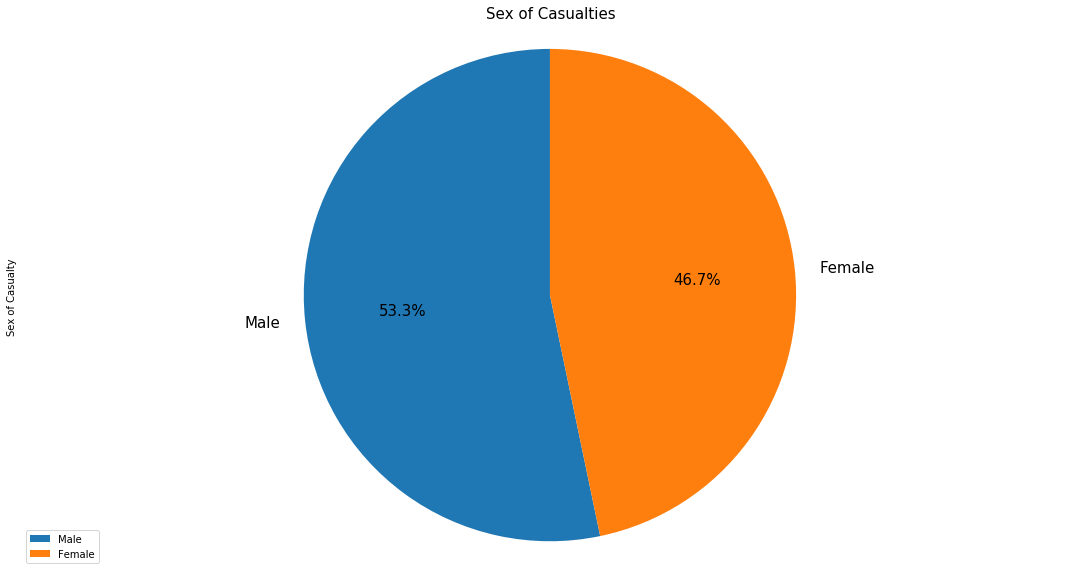

In [3]:
# Plot gender of casualties
casualty_gender_counts = cleaned_fatal_cycle_df['Sex of Casualty'].value_counts()
casualty_gender_graph = casualty_gender_counts.plot(kind="pie",y="Sex of Casualty", figsize=(19,10), 
                                              fontsize=15, startangle=90, autopct="%1.1f%%")

casualty_gender_graph.set_title("Sex of Casualties", fontsize=15)
casualty_gender_graph.axis('equal')
plt.legend(loc='lower left')

# Save the figure
plt.savefig("output_data/casualty_gender_graph.png")

plt.show()

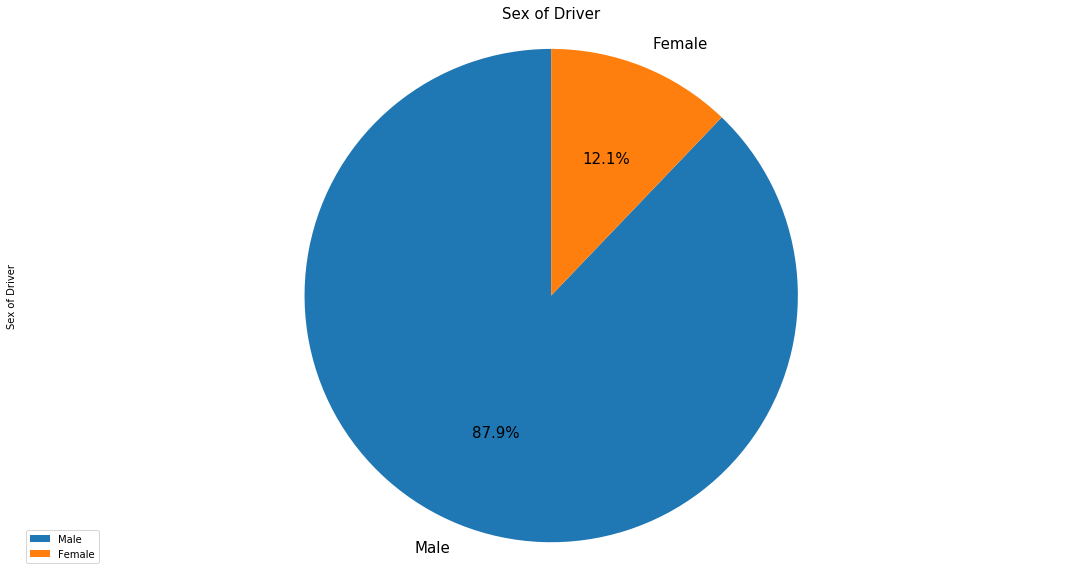

In [4]:
# Plot gender of driver
driver_gender_counts = cleaned_fatal_cycle_df['Sex of Driver'].value_counts()
driver_gender_graph = driver_gender_counts.plot(kind="pie",y="Sex of Driver", figsize=(19,10), 
                                              fontsize=15, startangle=90, autopct="%1.1f%%")

driver_gender_graph.set_title("Sex of Driver", fontsize=15)
driver_gender_graph.axis('equal')
plt.legend(loc='lower left')

# Save the figure
plt.savefig("output_data/driver_gender_graph.png")

plt.show()

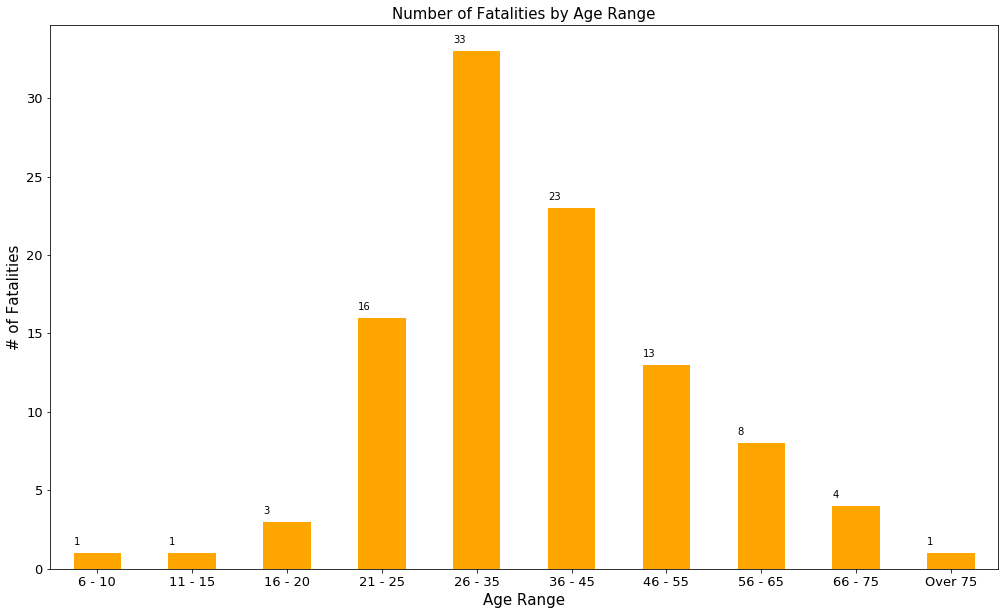

In [5]:
# Age of Casualties
age_of_casualty = cleaned_fatal_cycle_df.loc[cleaned_fatal_cycle_df["Age Band of Casualty"] != "Data missing or out of range"]
age_of_casualty = age_of_casualty["Age Band of Casualty"].value_counts()

age_of_casualty = age_of_casualty[["6 - 10", "11 - 15", "16 - 20", "21 - 25", "26 - 35", 
                                   "36 - 45", "46 - 55", "56 - 65", "66 - 75", "Over 75"]]

age_of_casualty_graph = age_of_casualty.plot(kind="bar", rot=0, color="orange", fontsize=13, legend=False, figsize=(17,10))

age_of_casualty_graph.set_title("Number of Fatalities by Age Range", fontsize=15)
age_of_casualty_graph.set_xlabel("Age Range", fontsize=15)
age_of_casualty_graph.set_ylabel("# of Fatalities", fontsize=15)

for p in age_of_casualty_graph.patches:
    age_of_casualty_graph.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.5))
    
# Save the figure
plt.savefig("output_data/age_of_casualty_graph.png")

plt.show()

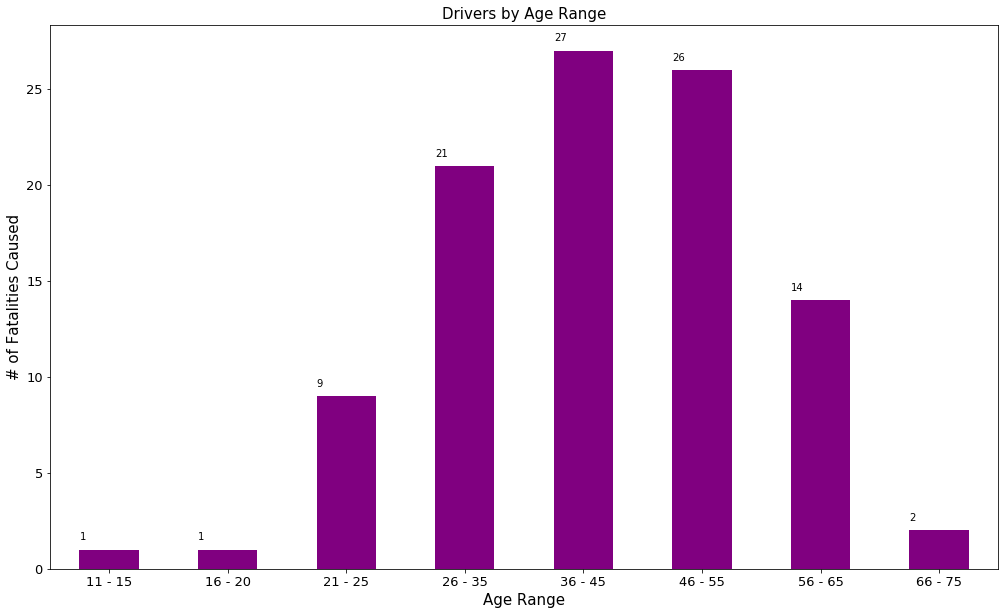

In [6]:
# Age of Drivers
age_of_driver = cleaned_fatal_cycle_df.loc[cleaned_fatal_cycle_df["Age Band of Driver"] != "Data missing or out of range"]
age_of_driver = age_of_driver["Age Band of Driver"].value_counts()

age_of_driver = age_of_driver[["11 - 15", "16 - 20", "21 - 25", "26 - 35", 
                               "36 - 45", "46 - 55", "56 - 65", "66 - 75"]]

age_of_driver_graph = age_of_driver.plot(kind="bar", rot=0, color="purple", fontsize=13, legend=False, figsize=(17,10))

age_of_driver_graph.set_title("Drivers by Age Range", fontsize=15)
age_of_driver_graph.set_xlabel("Age Range", fontsize=15)
age_of_driver_graph.set_ylabel("# of Fatalities Caused", fontsize=15)

for p in age_of_driver_graph.patches:
    age_of_driver_graph.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 0.5))
    
# Save the figure
plt.savefig("output_data/age_of_driver_graph.png")

plt.show()

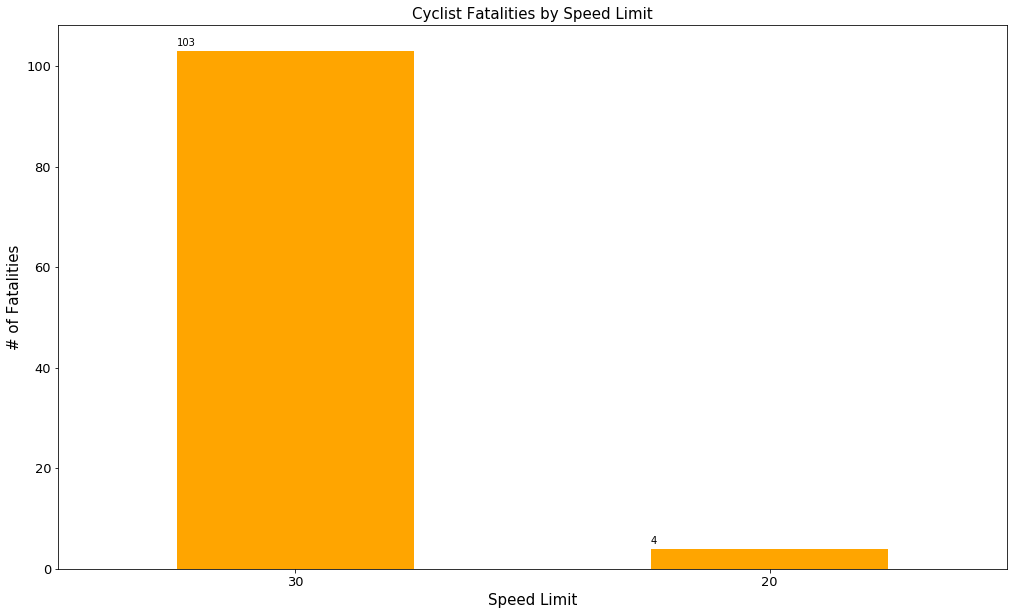

In [14]:
# Speed limit Graph
speed_limit_df = cleaned_fatal_cycle_df['Speed Limit'].value_counts()
speed_limit_graph = speed_limit_df.plot(kind="bar", rot=0, color="orange", fontsize=13, legend=False, figsize=(17,10))

speed_limit_graph.set_title(f"Cyclist Fatalities by Speed Limit", fontsize=15)
speed_limit_graph.set_xlabel("Speed Limit", fontsize=15)
speed_limit_graph.set_ylabel("# of Fatalities", fontsize=15)

for p in speed_limit_graph.patches:
    speed_limit_graph.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 1))
    
# Save the figure
plt.savefig("output_data/speed_limit_graph.png")

plt.show()

## Define Function for Plotting Bar Graph

In [90]:
def plot_bar_graph(x_values, y_values, x_label, y_label, title, color):
    
    # Format graph
    fig = plt.figure(figsize=(17,10))
    plt.title(title, fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    
    # Plot bar plot
    plt.bar(x_values, y_values, tick_label=x_values, color=color)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    # can't seem to annotate the values of each x value
    # graph.bar_label(graph.containers[0])
    
    # Show plot
    plt.show()
    
    return fig

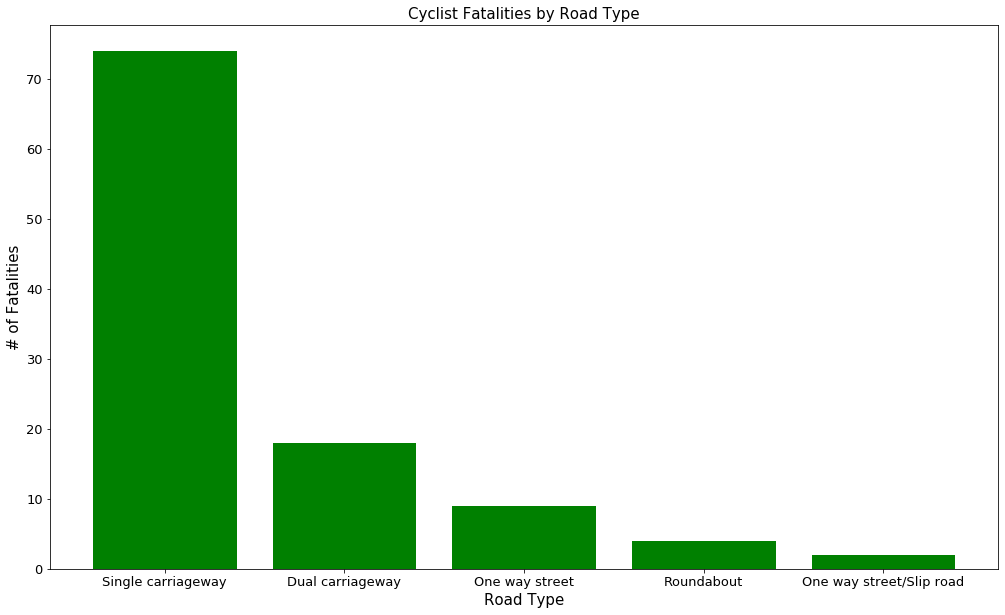

In [94]:
# Filter road type values
road_type_df = cleaned_fatal_cycle_df['Road Type'].value_counts().rename_axis('Road Type').reset_index(name='counts')

# Define bar graph values
x_values = road_type_df.iloc[:,0]
y_values = road_type_df.iloc[:,1]
x_label = "Road Type"
y_label = "# of Fatalities"
title = "Cyclist Fatalities by Road Type"
color = "green"

# Use defined bar plot
fig = plot_bar_graph(x_values, y_values, x_label, y_label,title, color)

# Save the figure
fig.savefig("output_data/road_type_graph.png")

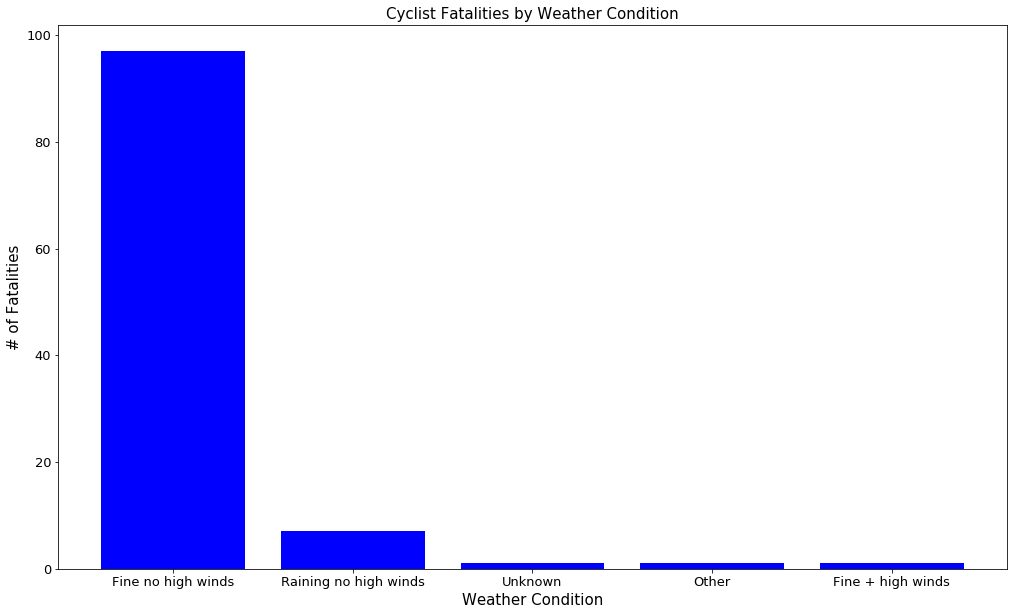

In [95]:
# Filter Weather condition values
weather_condition_df = cleaned_fatal_cycle_df['Weather Conditions'].value_counts().rename_axis('Weather Conditions').reset_index(name='counts')

# Define bar graph values
x_values = weather_condition_df.iloc[:,0]
y_values = weather_condition_df.iloc[:,1]
x_label = "Weather Condition"
y_label = "# of Fatalities"
title = "Cyclist Fatalities by Weather Condition"
color = "blue"

# Use defined bar plot
fig = plot_bar_graph(x_values, y_values, x_label, y_label,title, color)

# Save the figure
fig.savefig("output_data/weather_condition_graph.png")

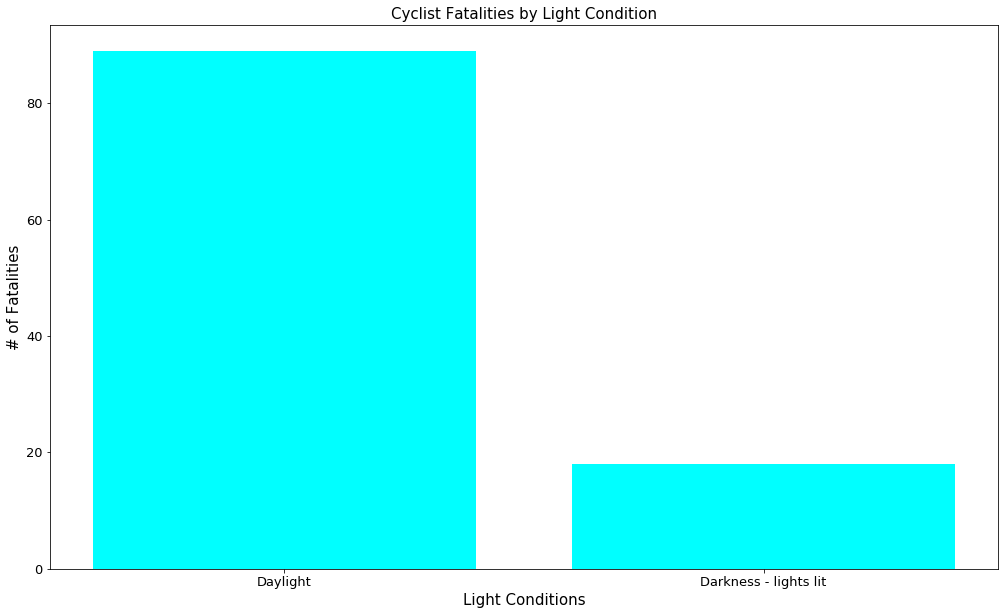

In [96]:
# Filter Light condition values
light_condition_df = cleaned_fatal_cycle_df['Light Conditions'].value_counts().rename_axis('Light Conditions').reset_index(name='counts')

# Define bar graph values
x_values = light_condition_df.iloc[:,0]
y_values = light_condition_df.iloc[:,1]
x_label = "Light Conditions"
y_label = "# of Fatalities"
title = "Cyclist Fatalities by Light Condition"
color = "cyan"

# Use defined bar plot
fig = plot_bar_graph(x_values, y_values, x_label, y_label,title, color)

# Save the figure
fig.savefig("output_data/light_condition_graph.png")

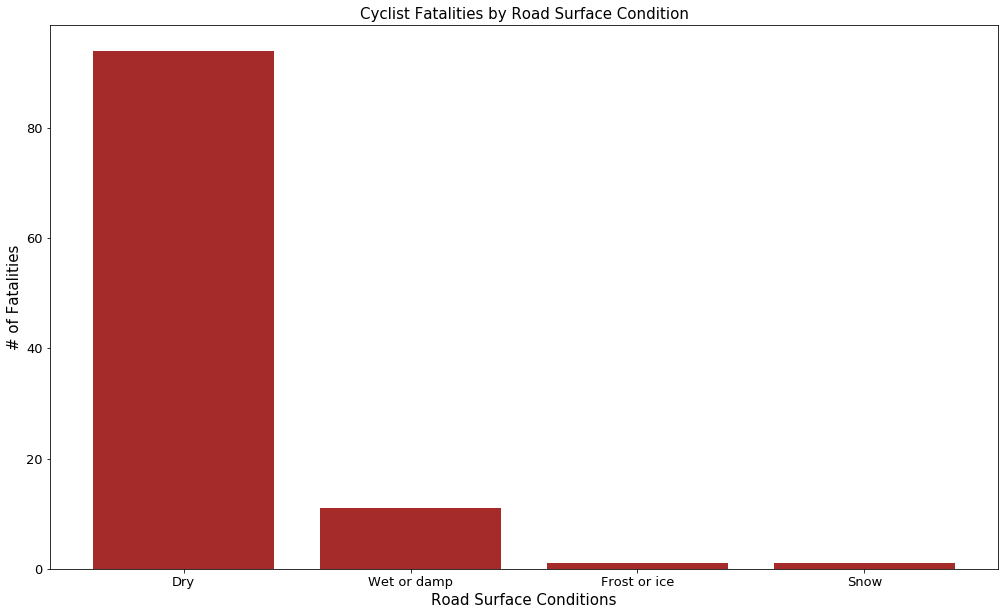

In [97]:
# Filter road surface condition values
road_surface_condition_df = cleaned_fatal_cycle_df['Road Surface Conditions'].value_counts().rename_axis('Road Surface Conditions').reset_index(name='counts')

# Define bar graph values
x_values = road_surface_condition_df.iloc[:,0]
y_values = road_surface_condition_df.iloc[:,1]
x_label = "Road Surface Conditions"
y_label = "# of Fatalities"
title = "Cyclist Fatalities by Road Surface Condition"
color = "brown"

# Use defined bar plot
fig = plot_bar_graph(x_values, y_values, x_label, y_label,title, color)

# Save the figure
fig.savefig("output_data/road_surface_condition_graph.png")

# Statistical Testing

In [ ]:
# Statistical test, t-test, ANOVA, Chi Square
